In [ ]:
import random, matplotlib.pyplot as plt
import statistics, math, numpy

def RandomWalk(steps, steps_m, sample_amount, prob_of_success):
  x_length = []
  sample_function_ensemble = []
  steps = steps #Number of steps
  steps_m = steps_m
  sample_functions_amount = sample_amount #Number of sample functions
  p = prob_of_success

  for i in range(sample_functions_amount):
      x0 = 0
      list = []
      for j in range(steps):
          list.append(x0)
          x = random.uniform(0,1)
          if x<=p:
              k = 1
          else:
              k = -1
          x0 = x0 + k
      sample_function_ensemble.append(list)

  mean = [] #Mean for all t
  sd = [] #SD for all t
  var = []
  neg_sd = []
  ensemble_at_m = []

  for j in range(len(sample_function_ensemble[0])):
      ensemble_on_t = []
      for i in sample_function_ensemble:
        ensemble_on_t.append(i[j])  
      mean_on_n = numpy.mean(ensemble_on_t) #Get mean on n
      var_on_n = numpy.var(ensemble_on_t) #Get variance on n
      sd_on_n = math.sqrt(var_on_n) #Get sd/var on time n
      neg_sd_on_n = numpy.negative(sd_on_n)
      mean.append(mean_on_n)
      var.append(var_on_n)
      sd.append(sd_on_n)
      neg_sd.append(neg_sd_on_n)
  max_val = numpy.max(sample_function_ensemble) #Get highest point reached
  min_val = numpy.min(sample_function_ensemble) #Get lowest point reached
  print('Probability (p):%.2f' %p)
  print('Average mean:%.2f' % (numpy.mean(mean[-1])))
  print('Variance at n=1: %.2f' %var[1])
  print('Variance at n=%d: %.2f' %(steps_m, var[steps_m]))
  print('Variance at n=%d: %.2f' % (steps, var_on_n))
  print('Standard Deviation at n=%d: \u00B1%.2f' % (steps, sd_on_n))
  print('Max:',max_val,'\tMin:', min_val, '\n')
  # legend = 'O_p=' + str(p)
  # plt.plot(var, linewidth = 2, label=legend)
  for i in range(len(sample_function_ensemble[0])):
    x_length.append(i) #Get length of x/time

  for y in sample_function_ensemble:
    plt.plot(x_length, y, color='black',linewidth=0.05) #Plot

  plt.plot(x_length, mean, linewidth = 2, color = 'red', label='mean')
  plt.legend(loc="upper left")
  plt.xlim(0, steps+int(0.05*steps))
  plt.title('Random Walk with %d steps and %d sample functions (p=%.2f)' % (steps, sample_functions_amount,p))

# plt.show()

In [ ]:
def abline(steps, p):
    """Plot a line from slope and intercept"""
    x_vals = numpy.arange(steps)
    iterable = (4 * p * (1-p) * x for x in range(steps))
    y_vals = numpy.fromiter(iterable, float)
    legend = 'T_p=' + str(p)
    plt.plot(x_vals, y_vals, linestyle = 'dashed', label = legend, linewidth = 3)

Probability (p):0.95
Average mean:449.12
Variance at n=1: 0.18
Variance at n=200: 37.83
Variance at n=500: 94.01
Standard Deviation at n=500: ±9.70
Max: 481 	Min: -3 



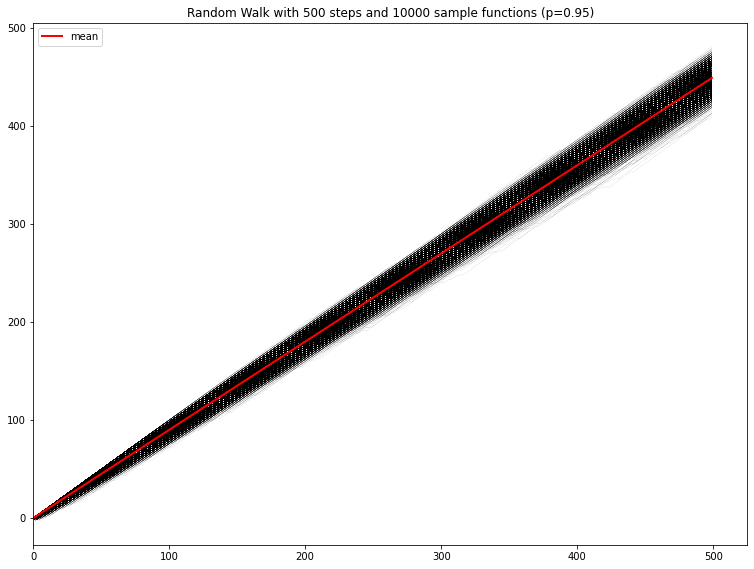

In [ ]:
plt.figure(figsize=[2*6.4, 2*4.8])
# A_T = abline(500, 0.35)
# A = RandomWalk(steps=500,steps_m=200,sample_amount=10000,prob_of_success=.35)
# B_T = abline(500, 0.5)
# B = RandomWalk(steps=500,steps_m=200,sample_amount=10000,prob_of_success=.5)
# C_T = abline(500, 0.75)
# C = RandomWalk(steps=500,steps_m=200,sample_amount=10000,prob_of_success=.75)
# D_T = abline(500, 0.95)
D = RandomWalk(steps=500,steps_m=200,sample_amount=10000,prob_of_success=.95)

# plt.legend(loc="upper left")
# plt.title('Variance of Random Walk with Different Probability p')
plt.show()

In [ ]:
step_m = [X[steps_m-1] for X in sample_function_ensemble]
step_n = [X[steps-1] for X in sample_function_ensemble]
numpy.cov(step_n, step_m)

In [ ]:
plt.title('Variance of Random Walk with %d steps and %d sample functions (p=%.2f)'% (steps, sample_functions_amount, p))
plt.plot(x_length, color='red', linestyle='dashed', linewidth=3)
plt.plot(var, linewidth = 3)

plt.show()